In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from pandas.io.formats.format import return_docstring
import random


#**Q1**
**Design a intent file on below data**

What is artificial intelligence?	Artificial intelligence is a branch of computer science that aims to create intelligent machines capable of performing tasks that typically require human intelligence.
How does machine learning work?	Machine learning is a subset of AI that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.
Explain the concept of deep learning.	Deep learning is a type of machine learning that involves neural networks with many layers (deep neural networks). It is particularly effective for tasks such as image and speech recognition.
What are neural networks?	Neural networks are computational models inspired by the structure and functioning of the human brain. They consist of interconnected nodes (neurons) that process information.
How is natural language processing used in AI?	Natural language processing (NLP) involves the interaction between computers and humans using natural language. It enables machines to understand, interpret, and generate human-like text.
What is the difference between supervised and unsupervised learning?	In supervised learning, the algorithm is trained on a labeled dataset, while unsupervised learning involves training on an unlabeled dataset, letting the algorithm find patterns on its own.
Can you provide examples of AI applications in real life?	AI has applications in various fields, including healthcare (diagnosis and treatment planning), finance (fraud detection), autonomous vehicles, virtual assistants, and more.
What are the ethical considerations in AI development?	Ethical considerations in AI development include issues related to bias in algorithms, transparency, accountability, job displacement, and the impact on privacy.
How does reinforcement learning work?	Reinforcement learning involves an agent learning through trial and error. It receives feedback in the form of rewards or penalties based on its actions in an environment.
What is computer vision?	Computer vision enables machines to interpret and make decisions based on visual data. It is used in image and video analysis, facial recognition, object detection, and more.
Explain the Turing test.	The Turing test is a measure of a machine's ability to exhibit intelligent behavior equivalent to or indistinguishable from that of a human. It assesses natural language conversation.
What are the challenges in developing strong AI?	Challenges in developing strong AI include achieving common sense reasoning, understanding context, ethical concerns, and addressing potential risks and biases in AI systems.
How is AI leveraged in the field of agriculture for precision farming?	AI is utilized in agriculture for precision farming through applications like crop monitoring, automated harvesting, and optimizing resource utilization for sustainable and efficient farming practices.
In what ways does AI contribute to the cybersecurity landscape?	AI enhances cybersecurity by identifying and responding to threats in real-time, predicting potential vulnerabilities, and improving overall resilience against cyber attacks.
Can AI assist in drug discovery and development in the pharmaceutical industry?	AI accelerates drug discovery by analyzing biological data, predicting potential drug candidates, and streamlining the process of bringing new pharmaceuticals to market.
What ethical considerations arise with the use of AI in criminal justice systems?	The use of AI in criminal justice raises ethical concerns related to bias, transparency, and fairness, prompting discussions on responsible and unbiased deployment of AI technologies.
How does AI impact environmental sustainability efforts?	AI contributes to environmental sustainability by optimizing resource management, monitoring pollution levels, and facilitating data-driven decision-making for sustainable development.
In what ways can AI be applied to enhance customer experience in various industries?	AI improves customer experience through personalized recommendations, chatbots for customer support, and predictive analytics to understand and meet customer preferences.
What challenges and opportunities does AI present in the realm of space exploration?	AI presents challenges and opportunities in space exploration by aiding in autonomous spacecraft navigation, data analysis, and the development of intelligent robotic systems for space missions.
What is the role of AI in augmenting human capabilities in the workplace?	AI augments human capabilities in the workplace by automating routine tasks, providing data-driven insights, and facilitating collaboration between humans and intelligent systems.
Can AI be used to address societal challenges such as poverty and inequality?	AI has the potential to address societal challenges by supporting data-driven decision-making in areas like poverty alleviation, healthcare accessibility, and education opportunities.
How can AI contribute to language translation and cross-cultural communication?	AI enhances language translation by employing natural language processing techniques, enabling more accurate and efficient cross-cultural communication in diverse global contexts.



In [3]:
intents_data = {

  "intents": [
    {
      "tag": "ai_intro",
      "patterns": ["What is artificial intelligence?", "Define artificial intelligence", "Explain AI"],
      "responses": ["Artificial intelligence is a branch of computer science that aims to create intelligent machines capable of performing tasks that typically require human intelligence."]
    },
    {
      "tag": "ml_work",
      "patterns": ["How does machine learning work?", "Explain machine learning", "What is the working principle of machine learning?"],
      "responses": ["Machine learning is a subset of AI that provides systems the ability to automatically learn and improve from experience without being explicitly programmed."]
    },
    {
      "tag": "deep_learning",
      "patterns": ["Explain the concept of deep learning", "What is deep learning?", "Tell me about deep neural networks"],
      "responses": ["Deep learning is a type of machine learning that involves neural networks with many layers (deep neural networks). It is particularly effective for tasks such as image and speech recognition."]
    },
    {
      "tag": "neural_networks",
      "patterns": ["What are neural networks?", "Define neural networks", "Explain the role of neurons in neural networks"],
      "responses": ["Neural networks are computational models inspired by the structure and functioning of the human brain. They consist of interconnected nodes (neurons) that process information."]
    },
    {
      "tag": "nlp",
      "patterns": ["How is natural language processing used in AI?", "Explain natural language processing", "What is NLP in AI?"],
      "responses": ["Natural language processing (NLP) involves the interaction between computers and humans using natural language. It enables machines to understand, interpret, and generate human-like text."]
    },
    {
      "tag": "supervised_unsupervised",
      "patterns": ["What is the difference between supervised and unsupervised learning?", "Explain supervised learning", "Define unsupervised learning"],
      "responses": ["In supervised learning, the algorithm is trained on a labeled dataset, while unsupervised learning involves training on an unlabeled dataset, letting the algorithm find patterns on its own."]
    },
    {
      "tag": "ai_applications",
      "patterns": ["Can you provide examples of AI applications in real life?", "Give me real-life examples of AI", "How is AI used in various fields?"],
      "responses": ["AI has applications in various fields, including healthcare (diagnosis and treatment planning), finance (fraud detection), autonomous vehicles, virtual assistants, and more."]
    },
    {
      "tag": "ethical_considerations",
      "patterns": ["What are the ethical considerations in AI development?", "Explain ethics in AI", "Discuss AI development ethics"],
      "responses": ["Ethical considerations in AI development include issues related to bias in algorithms, transparency, accountability, job displacement, and the impact on privacy."]
    },
    {
      "tag": "reinforcement_learning",
      "patterns": ["How does reinforcement learning work?", "Explain reinforcement learning", "Describe the concept of reinforcement learning"],
      "responses": ["Reinforcement learning involves an agent learning through trial and error. It receives feedback in the form of rewards or penalties based on its actions in an environment."]
    },
    {
      "tag": "computer_vision",
      "patterns": ["What is computer vision?", "Explain computer vision in AI", "Define the role of computer vision"],
      "responses": ["Computer vision enables machines to interpret and make decisions based on visual data. It is used in image and video analysis, facial recognition, object detection, and more."]
    },
    {
      "tag": "turing_test",
      "patterns": ["Explain the Turing test", "What is the Turing test?", "Describe the concept behind the Turing test"],
      "responses": ["The Turing test is a measure of a machine's ability to exhibit intelligent behavior equivalent to or indistinguishable from that of a human. It assesses natural language conversation."]
    },
    {
      "tag": "challenges_strong_ai",
      "patterns": ["What are the challenges in developing strong AI?", "Discuss challenges in strong AI development", "Explain hurdles in achieving strong AI"],
      "responses": ["Challenges in developing strong AI include achieving common sense reasoning, understanding context, ethical concerns, and addressing potential risks and biases in AI systems."]
    },
    {
      "tag": "ai_agriculture",
      "patterns": ["How is AI leveraged in the field of agriculture for precision farming?", "Explain AI applications in agriculture", "Discuss precision farming with AI"],
      "responses": ["AI is utilized in agriculture for precision farming through applications like crop monitoring, automated harvesting, and optimizing resource utilization for sustainable and efficient farming practices."]
    },
    {
      "tag": "ai_cybersecurity",
      "patterns": ["In what ways does AI contribute to the cybersecurity landscape?", "Explain AI's role in cybersecurity", "Discuss AI applications in cybersecurity"],
      "responses": ["AI enhances cybersecurity by identifying and responding to threats in real-time, predicting potential vulnerabilities, and improving overall resilience against cyber attacks."]
    },
    {
      "tag": "ai_drug_discovery",
      "patterns": ["Can AI assist in drug discovery and development in the pharmaceutical industry?", "Discuss AI in pharmaceutical drug discovery", "Explain AI's role in drug development"],
      "responses": ["AI accelerates drug discovery by analyzing biological data, predicting potential drug candidates, and streamlining the process of bringing new pharmaceuticals to market."]
    },
    {
      "tag": "ethical_ai_criminal_justice",
      "patterns": ["What ethical considerations arise with the use of AI in criminal justice systems?", "Discuss ethics in AI criminal justice", "Explain the ethical challenges in AI and criminal justice"],
      "responses": ["The use of AI in criminal justice raises ethical concerns related to bias, transparency, and fairness, prompting discussions on responsible and unbiased deployment of AI technologies."]
    },
    {
      "tag": "ai_environmental_sustainability",
      "patterns": ["How does AI impact environmental sustainability efforts?", "Discuss AI's role in environmental sustainability", "Explain AI applications in environmental conservation"],
      "responses": ["AI contributes to environmental sustainability by optimizing resource management, monitoring pollution levels, and facilitating data-driven decision-making for sustainable development."]
    },
    {
      "tag": "ai_customer_experience",
      "patterns": ["In what ways can AI be applied to enhance customer experience in various industries?", "Discuss AI applications for customer experience", "Explain how AI improves customer interactions"],
      "responses": ["AI improves customer experience through personalized recommendations, chatbots for customer support, and predictive analytics to understand and meet customer preferences."]
    },
    {
      "tag": "challenges_opportunities_ai_space_exploration",
      "patterns": ["What challenges and opportunities does AI present in the realm of space exploration?", "Discuss AI's role in space exploration challenges and opportunities", "Explain the impact of AI on space missions"],
      "responses": ["AI presents challenges and opportunities in space exploration by aiding in autonomous spacecraft navigation, data analysis, and the development of intelligent robotic systems for space missions."]
    },
    {
      "tag": "ai_augmenting_human_capabilities",
      "patterns": ["What is the role of AI in augmenting human capabilities in the workplace?", "Discuss AI's impact on human capabilities at work", "Explain how AI enhances human abilities in the workplace"],
      "responses": ["AI augments human capabilities in the workplace by automating routine tasks, providing data-driven insights, and facilitating collaboration between humans and intelligent systems."]
    },
    {
      "tag": "ai_societal_challenges",
      "patterns": ["Can AI be used to address societal challenges such as poverty and inequality?", "Discuss AI's role in addressing societal challenges", "Explain how AI can contribute to social issues"],
      "responses": ["AI has the potential to address societal challenges by supporting data-driven decision-making in areas like poverty alleviation, healthcare accessibility, and education opportunities."]
    },
    {
      "tag": "ai_language_translation",
      "patterns": ["How can AI contribute to language translation and cross-cultural communication?", "Discuss AI's role in language translation", "Explain how AI enhances cross-cultural communication"],
      "responses": ["AI enhances language translation by employing natural language processing techniques, enabling more accurate and efficient cross-cultural communication in diverse global contexts."]
    },
      {"tag": "greeting", "patterns": ["Hi there", "How are you", "Is anyone there?", "Hey", "Hola", "Hello", "Good day"],
         "responses": ["Hello", "Good to see you again", "Hi there, how can I help?"],

         },
        {"tag": "goodbye", "patterns": ["Bye", "See you later", "Goodbye", "Nice chatting to you, bye", "Till next time"],
         "responses": ["See you!", "Have a nice day", "Bye! Come back again soon."],

         },
        {"tag": "thanks", "patterns": ["Thanks", "Thank you", "That's helpful", "Awesome, thanks", "Thanks for helping me"],
         "responses": ["My pleasure", "You're Welcome"],

         },
  ]
}



# Save to intents.json
with open('content.json', 'w') as file:
    json.dump(intents_data, file, indent=4)

print("intents.json has been created.")


intents.json has been created.


#**Q2**
**Convert the intents.json file to an appropriate dataframe**

In [4]:
#importing the data
with open('content.json') as content:
  data1 = json.load(content)

tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]= intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

#converting dataframe
data = pd.DataFrame({'Questions': inputs, 'Answers':tags})


In [5]:
print(data) 4  

                           Questions   Answers
0   What is artificial intelligence?  ai_intro
1     Define artificial intelligence  ai_intro
2                         Explain AI  ai_intro
3    How does machine learning work?   ml_work
4           Explain machine learning   ml_work
..                               ...       ...
78                            Thanks    thanks
79                         Thank you    thanks
80                    That's helpful    thanks
81                   Awesome, thanks    thanks
82             Thanks for helping me    thanks

[83 rows x 2 columns]


#**Q3**
#**Part A**
Can you provide a histogram visualization representing the distribution of question lengths in the dataset?

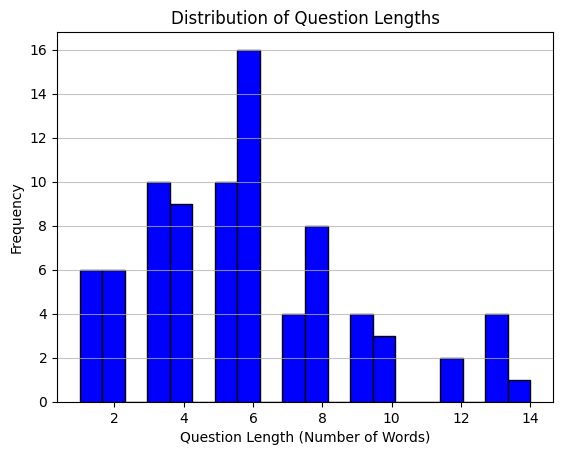

In [39]:
question_lengths = [len(question.split()) for question in data['Questions']]

# Create a histogram
plt.hist(question_lengths, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

#**Part B**

Share a bar chart that displays the top 10 most frequent words in the questions.

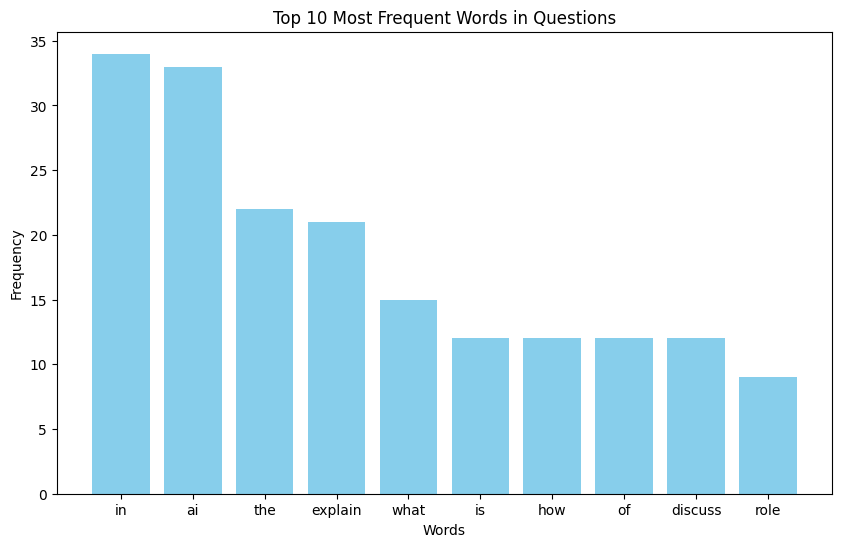

In [7]:
from collections import Counter
all_questions = ' '.join(data['Questions'])

# Tokenize the text (split it into words)
words = all_questions.lower().split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 10 most frequent words
top_words = word_counts.most_common(10)

# Extract words and their frequencies for plotting
words, frequencies = zip(*top_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Most Frequent Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

#**Q4**
**Clean the data and prepare it**

In [8]:
import string
data['Questions'] = data['Questions'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['Questions'] = data['Questions'].apply(lambda wrd: "".join(wrd))
print(data)

                          Questions   Answers
0   what is artificial intelligence  ai_intro
1    define artificial intelligence  ai_intro
2                        explain ai  ai_intro
3    how does machine learning work   ml_work
4          explain machine learning   ml_work
..                              ...       ...
78                           thanks    thanks
79                        thank you    thanks
80                    thats helpful    thanks
81                   awesome thanks    thanks
82            thanks for helping me    thanks

[83 rows x 2 columns]


#**Q5**
##**Part A**
  **Tokenize the Data**
  








In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming data is a pandas DataFrame with a 'Questions' column
X = data['Questions']
y = data['Answers']

# Tokenize the text
tokenizer = Tokenizer(num_words=2800)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to have consistent length
X_padded = pad_sequences(sequences)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)



#**Part B**
**Validate**

In [32]:
from sklearn.model_selection import StratifiedKFold

num_folds = 5  # You can adjust the number of folds
stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through the folds
# Loop through the folds
for fold, (train_index, test_index) in enumerate(stratkf.split(X_padded, y)):
    X_train, X_test = X_padded[train_index], X_padded[test_index]
    Y_train, Y_test = y[train_index], y[test_index]  # Corrected this line

    # Define your model
    input_shape = (X_train.shape[1])
    vocabulary = 2800
    output_length = 25 # Replace with the appropriate number of classes for your task

    i = Input(shape=input_shape)
    x = Embedding(vocabulary + 1, 10)(i)
    x = LSTM(10, return_sequences=True)(x)
    x = Flatten()(x)
    x = Dense(output_length, activation="softmax")(x)
    model = Model(i, x)

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

    # Train the model
    train = model.fit(X_train, Y_train, epochs=300, verbose=0)  # Adjust verbosity as needed

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

    # Print or store the evaluation metrics for each fold
    print(f'Fold {fold + 1} - Test Accuracy: {test_accuracy * 100:.2f}%')

# After the loop, you can summarize the overall performance or average metrics across folds


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fold 1 - Test Accuracy: 11.76%
Fold 2 - Test Accuracy: 5.88%
Fold 3 - Test Accuracy: 11.76%
Fold 4 - Test Accuracy: 6.25%


Fold 5 - Test Accuracy: 6.25%


In [10]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['Answers'])


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

##**Part C**
  **Do Label Encoding on Data**

In [12]:
#encoding
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(data['Answers'])


In [14]:
input_shape = X_train.shape[1]
print(input_shape)

14


In [15]:
#define vocab
vocabulary = len(tokenizer.word_index)
print('no of unique words : ', vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

no of unique words :  150
output length:  25


#**Q6**
**Create The Model**

In [16]:
from pandas.io.formats.format import return_docstring
#creating the model
#input_shape =
#vocabulary =
i = Input(shape=(input_shape))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)


#**Q7**
##**Part A**

  **Compile The Data**


In [17]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adamax',metrics=['accuracy'])

##**Part B**

 **Train The Data**

In [18]:
#training the model
train = model.fit(X_train,Y_train, epochs = 300)


Epoch 1/300
3/3 [==============================] - 3s 14ms/step - loss: 3.2176 - accuracy: 0.0303
Epoch 2/300
3/3 [==============================] - 0s 10ms/step - loss: 3.2143 - accuracy: 0.1061
Epoch 3/300
3/3 [==============================] - 0s 14ms/step - loss: 3.2125 - accuracy: 0.1364
Epoch 4/300
3/3 [==============================] - 0s 11ms/step - loss: 3.2110 - accuracy: 0.1667
Epoch 5/300
3/3 [==============================] - 0s 10ms/step - loss: 3.2095 - accuracy: 0.1515
Epoch 6/300
3/3 [==============================] - 0s 12ms/step - loss: 3.2083 - accuracy: 0.1667
Epoch 7/300
3/3 [==============================] - 0s 11ms/step - loss: 3.2070 - accuracy: 0.1667
Epoch 8/300
3/3 [==============================] - 0s 12ms/step - loss: 3.2057 - accuracy: 0.1667
Epoch 9/300
3/3 [==============================] - 0s 12ms/step - loss: 3.2045 - accuracy: 0.1667
Epoch 10/300
3/3 [==============================] - 0s 11ms/step - loss: 3.2034 - accuracy: 0.1818
Epoch 11/300
3/3 [=

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])

In [21]:
#training the model
train = model.fit(X_train,Y_train, epochs = 300)


Epoch 1/300
3/3 [==============================] - 2s 15ms/step - loss: 2.7619 - accuracy: 0.1970
Epoch 2/300
3/3 [==============================] - 0s 15ms/step - loss: 2.7174 - accuracy: 0.1970
Epoch 3/300
3/3 [==============================] - 0s 15ms/step - loss: 2.7067 - accuracy: 0.1970
Epoch 4/300
3/3 [==============================] - 0s 14ms/step - loss: 2.6862 - accuracy: 0.2121
Epoch 5/300
3/3 [==============================] - 0s 18ms/step - loss: 2.6797 - accuracy: 0.2121
Epoch 6/300
3/3 [==============================] - 0s 15ms/step - loss: 2.6597 - accuracy: 0.2273
Epoch 7/300
3/3 [==============================] - 0s 15ms/step - loss: 2.6415 - accuracy: 0.2273
Epoch 8/300
3/3 [==============================] - 0s 13ms/step - loss: 2.6288 - accuracy: 0.2273
Epoch 9/300
3/3 [==============================] - 0s 13ms/step - loss: 2.6180 - accuracy: 0.2121
Epoch 10/300
3/3 [==============================] - 0s 15ms/step - loss: 2.6081 - accuracy: 0.2424
Epoch 11/300
3/3 [=

#**Part C**
**Test the model with Appropriate metrics**

In [ ]:
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
accuracy_score(Y_test,predict)

In [29]:
#predict_probs = model.predict(X_test)
#predict_binary = (predict_probs > 0.5).astype(int)

#precision = precision_score(Y_test, predict_binary)
#recall = recall_score(Y_test, predict_binary)
#f1 = f1_score(Y_test, predict_binary)
#conf_matrix = confusion_matrix(Y_test, predict_binary)

#print(f'Precision: {precision:.2f}')
#print(f'Recall: {recall:.2f}')
#print(f'F1 Score: {f1:.2f}')
#print('Confusion Matrix:')
#print(conf_matrix)

#**Q7**

###**Inference Function**

#*your model should react ' this type of conversation is not allowed' if any word found in input from the list*#
slang_words = [
    "lit",
    "chill",
    "grub",
    "ghosted",
    "savage",
    "dead",
    "fleek",
    "Netflix and chill",
    "fire",
    "buzzkill",
    "boss",
    "bounce",
    "dude",
    "bro",
    "squad",
    "hella",
    "lit AF",
    "FOMO",
    "YOLO",
    "Gucci"
]

In [ ]:
import string
import random

slang_words = [
    "lit",
    "chill",
    "grub",
    "ghosted",
    "savage",
    "dead",
    "fleek",
    "netflix and chill",
    "fire",
    "buzzkill",
    "boss",
    "bounce",
    "dude",
    "bro",
    "squad",
    "hella",
    "lit af",
    "fomo",
    "yolo",
    "gucci"
]

while True:
    texts_p = []
    prediction_input = input("you: ")

    # removing punctuation
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    # check for slang words
    if any(word in prediction_input for word in slang_words):
        print("BOT: This type of conversation is not allowed.")
    else:
        # tokenization and padding
        prediction_input = tokenizer.texts_to_sequences(texts_p)
        prediction_input = np.array(prediction_input).reshape(-1)
        prediction_input = pad_sequences([prediction_input], input_shape)

        output = model.predict(prediction_input)
        output = output.argmax()

        # finding the right tag
        response_tag = le.inverse_transform([output])[0]
        print("BOT: ", random.choice(responses[response_tag]))

        if response_tag == 'goodbye':
            break
